# Identitas Diri Untuk Submission Dicoding

Nama  : Dian Rezky Wulandari


Email : dianrezky03@gmail.com

Modul : Belajar Machine Learning Untuk Pemula 

# IMPORT LIBRARY DAN CONNECT GDRIVE

In [32]:
#import library

import tensorflow as tf
import numpy as np
import shutil, os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from keras.models import model_from_json
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#connect google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#folder awal dataset

base_dir = 'gdrive/My Drive/dataset/dicoding/rockpaperscissors'

rock_dir        = os.path.join(base_dir,'rock')
papper_dir      = os.path.join(base_dir,'paper')
scissors_dir    = os.path.join(base_dir,'scissors')



In [4]:
#membuat folder train dan validation

train_dir       = os.path.join(base_dir,'train')
validation_dir  = os.path.join(base_dir,'validation')

if os.path.exists(train_dir) == False:
  os.mkdir(train_dir)
if os.path.exists(validation_dir) == False:
  os.mkdir(validation_dir)

In [5]:
#menginisialisasikan location dari folder yang akan dibuat
train_rock      = os.path.join(train_dir,'rock')
train_scissors  = os.path.join(train_dir,'scissors')
train_papper    = os.path.join(train_dir,'paper')

validation_rock     = os.path.join(validation_dir,'rock')
validation_scissors = os.path.join(validation_dir,'scissors')
validation_papper   = os.path.join(validation_dir,'paper')

#membuat folder pada gdrive

if os.path.exists(train_rock) == False:
  os.mkdir(train_rock)
if os.path.exists(train_scissors) == False:
  os.mkdir(train_scissors)
if os.path.exists(train_papper) == False:
  os.mkdir(train_papper)

if os.path.exists(validation_rock) == False:
  os.mkdir(validation_rock)
if os.path.exists(validation_papper) == False:
  os.mkdir(validation_papper)
if os.path.exists(validation_scissors) == False:
  os.mkdir(validation_scissors)

In [6]:
#membuat folder untuk menyimpan checkpoint 

checkpoint_dir  = os.path.join(base_dir, 'checkpoint')

if os.path.exists(checkpoint_dir) == False:
  os.mkdir(checkpoint_dir)


# Train dan Test Split


In [7]:
#Ukuran validation set harus 40% dari total dataset 

train_rock_dir, validation_rock_dir = tts(os.listdir(rock_dir), test_size = 0.40)
train_papper_dir, validation_papper_dir = tts(os.listdir(papper_dir), test_size = 0.40)
train_scissors_dir, validation_scissors_dir = tts(os.listdir(scissors_dir), test_size = 0.40)

In [8]:
#mengcopy file yang sudah di split ke folder train_variabel

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir,file), os.path.join(train_rock,file))
for file in train_papper_dir:
  shutil.copy(os.path.join(papper_dir,file), os.path.join(train_papper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))



In [9]:
#mengcopy file yang sudah di split ke folder validation_variabel

for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir,file), os.path.join(validation_rock,file))

for file in validation_papper_dir:
  shutil.copy(os.path.join(papper_dir,file), os.path.join(validation_papper,file))

for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(validation_scissors,file))


**PROSES IMAGE DATA GENERATOR DAN AUGMENTASI GAMBAR**

In [10]:
#transformasi data yang akan digunakan.

train_datagen = IDG(
    rescale=1./255,
    rotation_range = 20,    
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
)
validation_datagen = IDG(
    rescale=1./255,
    rotation_range = 20,    
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode = 'nearest',
)

In [11]:
#mendefinisikan darimana sumber datanya berasal

train_data_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 32
)

validation_data_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
model = Sequential(
    [
     Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(128, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Flatten(),
     Dropout(0.5),
     Dense(512, activation='relu'),
     Dense(3, activation='softmax')
    ]
)

In [13]:
#melihat keseluruhan network

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Membuat Fungsi Callback Untuk Mencegah Overfitting dan Menghentikan Training ketika akurasi sudah cukup**

In [15]:
class Callbackitem(Callback):
  def epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.98:
      print("\Akurasi Sudah Diatas 98%. Training Akan Dihentikan")
      self.model.stop_training = True
    
#memanggil kelas callbackitem

callbacks_ = Callbackitem()

In [16]:
#data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel
#epoch adalah hyperparameter yang menentukan berapa kali algoritma pembelajaran akan bekerja mengolah seluruh dataset training.

stop = model.fit(
    train_data_generator,
    epochs = 20,
    steps_per_epoch = 41,
    validation_data = validation_data_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks=[callbacks_]
)


Epoch 1/20
41/41 - 83s - loss: 1.1650 - accuracy: 0.3841 - val_loss: 0.9945 - val_accuracy: 0.5324
Epoch 2/20
41/41 - 81s - loss: 0.8115 - accuracy: 0.6677 - val_loss: 0.5342 - val_accuracy: 0.8206
Epoch 3/20
41/41 - 81s - loss: 0.4584 - accuracy: 0.8308 - val_loss: 0.3250 - val_accuracy: 0.8866
Epoch 4/20
41/41 - 81s - loss: 0.3460 - accuracy: 0.8902 - val_loss: 0.2806 - val_accuracy: 0.9086
Epoch 5/20
41/41 - 81s - loss: 0.3392 - accuracy: 0.8727 - val_loss: 0.2844 - val_accuracy: 0.9039
Epoch 6/20
41/41 - 81s - loss: 0.3090 - accuracy: 0.8819 - val_loss: 0.3058 - val_accuracy: 0.8912
Epoch 7/20
41/41 - 81s - loss: 0.2528 - accuracy: 0.9040 - val_loss: 0.2709 - val_accuracy: 0.9016
Epoch 8/20
41/41 - 81s - loss: 0.2208 - accuracy: 0.9215 - val_loss: 0.1919 - val_accuracy: 0.9317
Epoch 9/20
41/41 - 80s - loss: 0.2261 - accuracy: 0.9192 - val_loss: 0.2151 - val_accuracy: 0.9132
Epoch 10/20
41/41 - 81s - loss: 0.1911 - accuracy: 0.9314 - val_loss: 0.1847 - val_accuracy: 0.9468
Epoch 11/

In [17]:
checkpoint_file = os.path.join(checkpoint_dir, "model.h5")

save_model_path = checkpoint_file

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At gdrive/My Drive/dataset/dicoding/rockpaperscissors/checkpoint/model.h5...


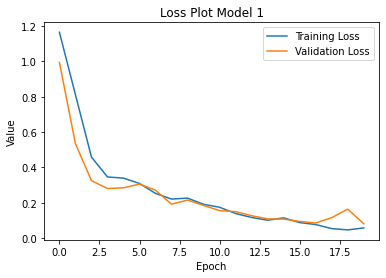

In [18]:
#loss train dan validation

#print("Grafik Model 1")

plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.plot(stop.history['loss'], label='Training Loss')
plt.plot(stop.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()



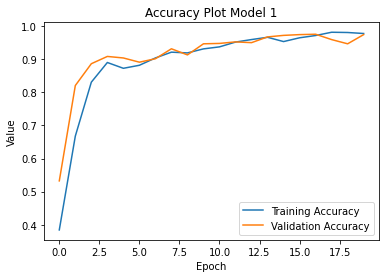

In [19]:
#accuracy train dan validation

plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.plot(stop.history['accuracy'], label='Training Accuracy')
plt.plot(stop.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# MAIN PROGRAM

In [20]:
#masukkan model yang sudah disimpan kedalam file .h5

model_h5 = load_model(checkpoint_file, compile=False)

print(model_h5)

In [21]:
def preprocess(file_img, input_size):
  conv_img  = file_img.convert('RGB').resize(input_size, resample= 0)
  image_arr = (np.array(conv_img))/255
  return image_arr

def reshape(image_arr):
  return np.stack(image_arr, axis=0)

Masukkan File Yang Anda Inginkan : 


Percobaan Ke -  1 



Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png

Nama File Yang Diinput :  1Io5Ksm3bqy87EAU.png 


This Is  Scissors (  99.99615 % )


Apakah Anda Ingin Mencoba Lagi (y//t) : 
t


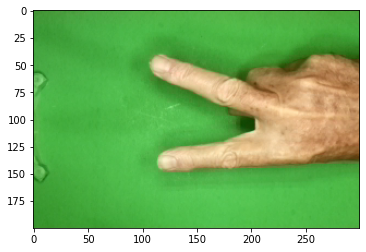

In [31]:
print("Masukkan File Yang Anda Inginkan : \n")

labels =['Paper', 'Rock', 'Scissors']
z=1
ans = 'y'

while ans=='y':

  print("\nPercobaan Ke - ", z,"\n")

  upload_file = files.upload()

  for i in upload_file.keys():
    
    path_file = i
    print("\nNama File Yang Diinput : ", i, "\n\n")

    images = image.load_img(path_file)
    imgplot = plt.imshow(images)
    x = preprocess(images, input_size=(150,150))
    x = reshape([x])
    
    class_image = model_h5.predict(x)

    print("This Is ",labels[np.argmax(class_image)],"( ",np.max(class_image*100),"% )\n\n")

    print("Apakah Anda Ingin Mencoba Lagi (y//t) : ")
    ans = str(input())

    z=z+1
    


